In [1]:
#python import statements

import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
import itertools

In [2]:
#qiskit import statements

from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import random_statevector, Statevector
import qiskit.quantum_info as qi
from qiskit.circuit import Parameter #allows us to have parameterized gates
from qiskit.extensions import UnitaryGate

# Use Aer's qasm_simulator
simulator = AerSimulator()

In [9]:
#singlet state preparation

prep = QuantumCircuit(2, 2)

prep.x([0,1])
prep.h(0)
prep.cx(0,1)
prep.barrier([0,1])

prep.draw()

┌───┐┌───┐      ░ 
q_0: ┤ X ├┤ H ├──■───░─
     ├───┤└───┘┌─┴─┐ ░ 
q_1: ┤ X ├─────┤ X ├─░─
     └───┘     └───┘ ░ 
c: 2/══════════════════

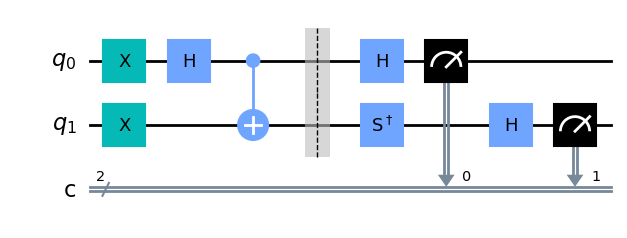

In [16]:
#Alice recieves and does her measurement

ab_circuit = QuantumCircuit(2, 2)

def alice_meas(choice):
    if choice ==1:
        ab_circuit.h(0)
        ab_circuit.measure(0,0)
    elif choice == 2:
        ab_circuit.measure(0,0)
    elif choice == 3:
        ab_circuit.sdg(0)
        ab_circuit.h(0)
        ab_circuit.measure(0,0)

def bob_meas(choice):
    if choice ==1:
        ab_circuit.h(1)
        ab_circuit.measure(1,1)
    elif choice == 2:
        ab_circuit.sdg(1)
        ab_circuit.h(1)
        ab_circuit.measure(1,1)
    elif choice == 3:
        ab_circuit.measure(1,1)

alice_meas(1)
bob_meas(2)

full_circuit = ab_circuit.compose(prep, [0,1], front=True)

full_circuit.draw("mpl")